# Python Tutorial: Quickly Make Beautiful Interactive Maps - Zoom In

This is the second part in our four part series on how to use python to quickly create interactive maps.  

In Part 1 we demonstrated how to use Python to create a `Map` object, locate it, decide the zoom range and tiles.     
Here we focus on layer features most commonly used in a zoomed-in map:   
* Markers 
* Marker clusters (markers that group when you zoom out)
* Designing marker icons (image and text)
* Adding Circles

**Disclaimer**  
He we discuss only a handful of features which we use frequently. The reader is encouraged to use the module help pages to explore the full potential and updates in the API.  

Maps used are provided by © OpenStreetMap contributors. 

# To Do
**Eyal** 
* Do a html size comparison between Markers and Circles, and perhaps a plot on the bottom.  

In [1]:
import folium  # to install: pip install folium

folium.__version__

u'0.5.0'

## Data  

To set the stage we will introduce some data that we want to put on a map. Here we us `pandas`, but this is not required (`lists` and `tuples` work fine, too).  
(We used [Google Maps API](`https://maps.googleapis.com`) to pull the actual locations, all located in New York City)   

In [2]:
places = ['4 Washington Place',
 '10 Washington Place',
 '16 Washington Place',
 '22 Washington Place',
 '28 Washington Place',
 '34 Washington Place',
 '40 Washington Place',
 '46 Washington Place',
 '64 Washington Place',
 '70 Washington Place',
 '76 Washington Place',
 '82 Washington Place',
 '88 Washington Place',
 '94 Washington Place']


latitude_longitudes = [(40.729020400000003, -73.99428429999999),
 (40.729370000000003, -73.995001299999998),
 (40.729528100000003, -73.995153799999997),
 (40.729940999999997, -73.995627599999992),
 (40.729841800000003, -73.995996199999993),
 (40.7300495, -73.995843800000003),
 (40.730065400000001, -73.995875500000011),
 (40.729164500000003, -73.994440999999995),
 (40.731659499999999, -73.999168999999995),
 (40.731653999999999, -73.999519599999999),
 (40.731793499999988, -73.999886799999999),
 (40.731885699999999, -74.000196599999995),
 (40.7319855, -74.000376799999998),
 (40.732303399999999, -74.000484200000002)]

In [4]:
import pandas as pd # pip install pandas

df_ = pd.DataFrame({'latitude_longitude': latitude_longitudes}, index=places)
df_.index.name = 'place'
df_

,latitude_longitude
place,
4 Washington Place,"(40.7290204, -73.9942843)"
10 Washington Place,"(40.72937, -73.9950013)"
16 Washington Place,"(40.7295281, -73.9951538)"
22 Washington Place,"(40.729941, -73.9956276)"
28 Washington Place,"(40.7298418, -73.9959962)"
34 Washington Place,"(40.7300495, -73.9958438)"
40 Washington Place,"(40.7300654, -73.9958755)"
46 Washington Place,"(40.7291645, -73.994441)"
64 Washington Place,"(40.7316595, -73.999169)"


## Markers 

`folium.Marker` can be aggregated to a layer with `folium.FeatureGroup`. 

In [6]:
# ====== Create the Marker Group layer ======
marker_group = folium.FeatureGroup(name='Location Markers')

for idx, row in df_.iterrows():
    label = "{} New York, NY ".format(idx) # we can label each label with popup 
    folium.Marker(row['latitude_longitude'], popup=label).add_to(marker_group)

# ====== Create a map object, location and zoom ======
center_latitude, center_longitude = 40.729183, -73.994263
location = (center_latitude, center_longitude)
zoom_start = 18

map_ = folium.Map(location=location, zoom_start=zoom_start, control_scale=True) 

# ====== Add Marker Group Layer to the map ======
marker_group.add_to(map_) # or: map_.add_child(marker_group)

# ====== Display ======
# map_.save('my_map.html') # (alternatively create HTML)

map_ # display in notebook

Note: Click on an icon to read its label. 

## Marker Clusters  
When zooming out in the previous map, you will notice that the `Marker` objects tend to overlap.  
A useful alternative to `folium.FeatureGroup` is `plugins.MarkerCluster`, which will aggregate the markers into a more interactive object that describes the number of markers it is made of and has a dynamic click-to-zoom-in feature.


In [7]:
from folium import plugins

In [8]:
# ====== Create the Marker Cluster layer ======
# this code is similar to before where we now use plugins.MarkerCluster
marker_group_clustered = plugins.MarkerCluster(name='Location Markers Clustered')

for idx, row in df_.iterrows():
    label = "{} New York, NY ".format(idx) # we can label each label with popup 
    folium.Marker(row['latitude_longitude'], popup=label).add_to(marker_group_clustered)
    
# ====== Create a map object, location and zoom ======
center_latitude, center_longitude =  40.731654, -73.9995196
location = (center_latitude, center_longitude)
zoom_start = 18

map_ = folium.Map(location=location, zoom_start=zoom_start, control_scale=True) 

# ====== Add Marker Cluster Layer to the map ======
marker_group_clustered.add_to(map_) # or map_.add_child(marker_group_clustered)

# ====== Display ======
# map_.save('my_map.html') # (alternatively create HTML)

map_ # display in notebook

Notes:
* Zoom out and back in to see what happens  
* Zoom out again and then click on a cluster. The map should either zoom in automatically while showing smaller clusters or the markers.  
* The marker label functionality is the same as before 

## Icons

`folium.Icon` enables you to choose from a large variety of icons and colors for the Markers.  

keywords:   
`prefix` - The prefix indicating the source of `icon` (default is `glyphicon`; `fa` for font-awesome)    
`icon` - The name of the marker sign.     
`color` - the color of the marker  
`icon_color` - the color of the sign of the marker  

Supported colors:  
```
['red', 'blue', 'green', 'purple', 'orange', 'darkred',
'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
'gray', 'black', 'lightgray']
```


There are two main free sources of icons to choose from:  

* [fontawesome.com gallery (`prefix='fa'`)](https://fontawesome.com/icons?d=gallery)   
  
* [bootstrap 3 glyphicon (`prefix='glyphicon'`)](https://getbootstrap.com/docs/3.3/components/)      


In the following we create a `FeatureGroup`, as before, but we now feed the `icon` keyword with an  `Icon` object.  

In [12]:
map_ = folium.Map(location=location, zoom_start=zoom_start, control_scale=True)  # creating new map object

marker_group = folium.FeatureGroup(name='Location Markers')

# ============ Many options to choose from ===========
# This is a bit of overkill, but gives you and idea of what is possible

# full list of colors
l_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred', 'beige', 'darkblue', 
            'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
            'gray', 'black', 'lightgray']

# combining options from fontawesome and bootstrap
l_icons = ['male', 'female', 'building' ] # from fa (fontawesome)
l_icons +=['info-sign', 'fire', 'camera'] # from glyphicons (bootstrap)
l_prefix = (['fa'] * 3) +  (['glyphicon'] * 3)

# ====== Create the Marker Group layer while customesing Icons ======
i = -1
for idx, row in df_.iterrows():
    label = "{} New York, NY ".format(idx) # we can label each label with popup 
    # ===== updating for each icon =======
    i += 1
    icon =  l_icons[i % len(l_icons)]
    color = l_colors[i % len(l_colors)] # color of marker
    icon_color = l_colors[::-1][i % len(l_colors)] # color of marker drawing
    prefix = l_prefix[i % len(l_prefix)] #'glyphicon' #'fa'
    # ====================================
    icon = folium.Icon(icon=icon, prefix=prefix, color=color, icon_color=icon_color)
    folium.Marker(row['latitude_longitude'], popup=label, icon=icon).add_to(marker_group)
 
map_.add_child(marker_group) # or: marker_group.add_to(map_)
map_.add_child(folium.LayerControl(position='topleft', collapsed=True)) # adding Layer Control (optional)
    
map_

For additional information on icons see this [Github page](https://github.com/lvoogdt/Leaflet.awesome-markers).   


## Circles

Alternatively you can also mark locations with circles, either full or empty.   
To display in units of meters use `folium.Circle`. For units of pixles use `folium.CircleMarker`.

In [13]:
map_ = folium.Map(location=location, zoom_start=zoom_start, control_scale=True)  # creating new map object

radius = 50

# ========= In units of meters ============
circle_name = 'my full circle in {} meters'.format(radius)
circle_full = folium.Circle(location=location, radius=radius, fill_opacity=0.3, popup=circle_name, 
                            color='#3186cc',fill_color='#3186cc', fill=True)

map_.add_child(circle_full) # or circle_full.add_to(map_)

# ========= In units of pixels ============
circle_name = 'my full circle in {} pixels'.format(radius)

location2 = (location[0] + 0.0005, location[1] + 0.001)
circle_full_pixels = folium.CircleMarker(location=location2, radius=radius, fill_opacity=0.3, popup=circle_name, 
                            color='#3186cc',fill_color='#3186cc', fill=True)

map_.add_child(circle_full_pixels) # or circle_full_pixels.add_to(map_)
# ==========================================

map_

Note: 
* Click on a circles to see the labels displayed  
* Zoom out and notice that the meters circle gets smaller (remains 50 meters), where the pixel one remains the same size (50 pixels).  
* `Circle`s and `CircleMarker`s may be added in `FeatureGroup` and  `MarkerCluster` in the same manner as `Marker`s.  

Let's do the same but with empty circles around two points.  
Here we also show that you can bold-face the label name with JavaScript `<b>...</b>`, and enter more than one line with `<br>`.  

In [14]:
radius_fracs = [0.25, 0.5, 0.75, 1.]

center_latitude, center_longitude = 40.729183, -73.994263
location = (center_latitude, center_longitude)
map_ = folium.Map(location=location, zoom_start=zoom_start, control_scale=True)  # creating new map object

for idx, row in df_.iloc[[0, 6]].iterrows(): # looping over locations (choosing two- index location 0 and 6)
    for frac in radius_fracs: # looping over the radius factions
        radius_temp = radius * frac
        name = "<b>{}</b><br>{:0.1f} meters".format(idx, radius_temp)
        folium.Circle(location=row['latitude_longitude'], radius=radius_temp, fill_opacity=0.3, popup=name, 
                             color='#3186cc',fill_color='#3186cc', fill=False).add_to(map_)

map_

Note: Click on any circle to see the label result (two lines where the title is boldfaced).  

## Marker Summary

In this second part of the four part series we explored putting markers on a map.  

One should be cautious, however, of a crucial limitation of using markers - the size of the map increases linearly with the number of `Marker` objects.   
We calculate each to be roughly 1 kByte in size.  This means that 1,000 markers will quickly bring the size of the map up to 1 MByte (on HTML or rendered in a notebook).

In the next post we resolve this issue by explaining how to create heatmaps and choropleths.  


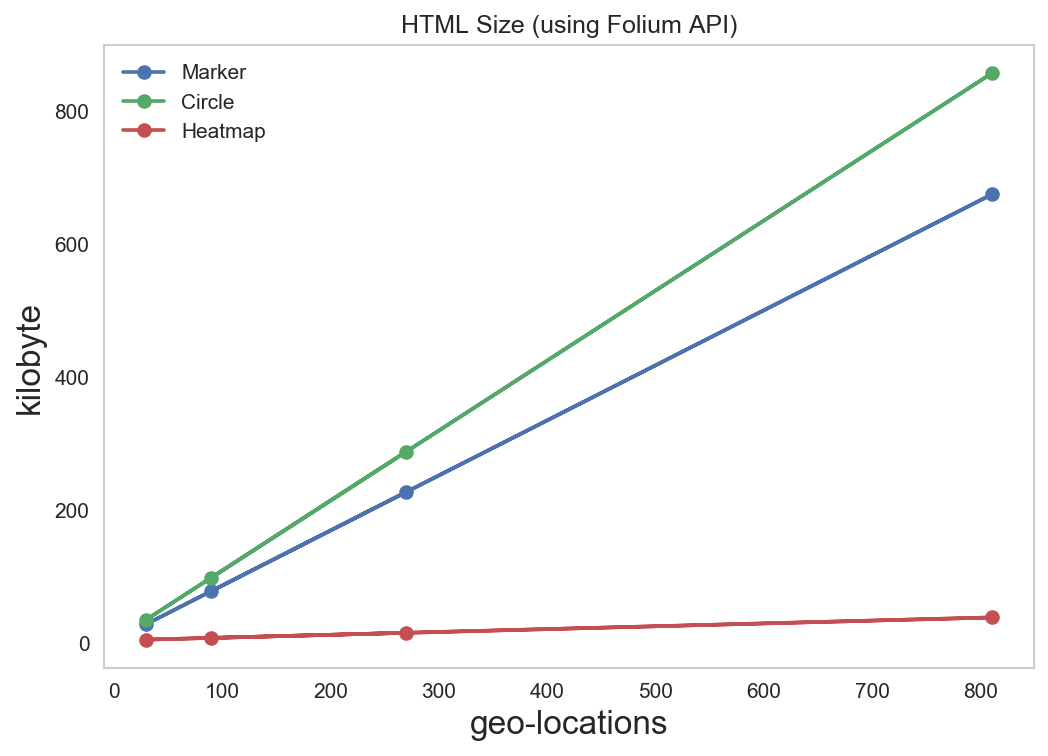